**BMI Calculator Advanced Model**

Enter your weight in kilograms:  76
Enter your height in meters:  5.7


Your BMI is: 2.34
Category: Underweight


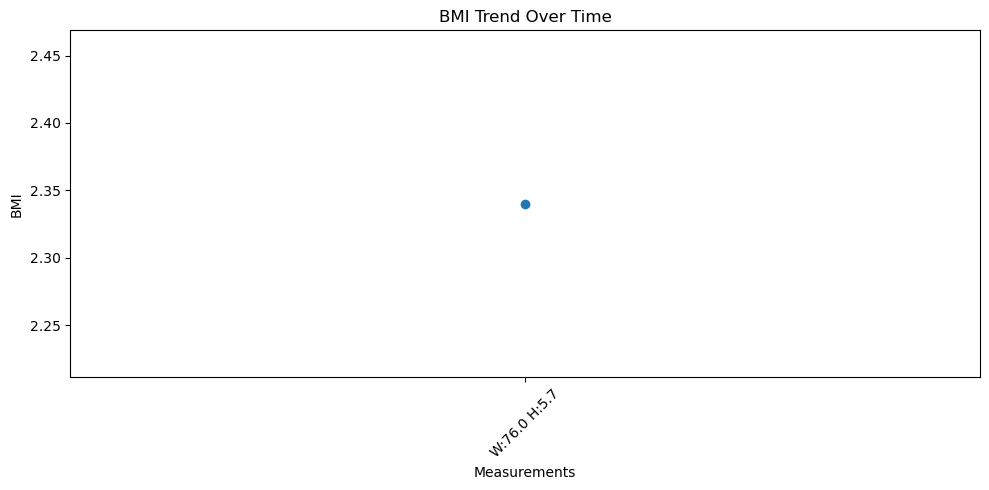

In [2]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import os

def calculate_bmi(weight, height):
    return weight / (height ** 2)

def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obesity"

def save_result(weight, height, bmi, category):
    with open("bmi_history.txt", "a") as file:
        file.write(f"{weight},{height},{bmi:.2f},{category}\n")

def view_history():
    if not os.path.exists("bmi_history.txt"):
        print("No history found.")
        return

    dates, bmis = [], []
    with open("bmi_history.txt", "r") as file:
        for line in file:
            weight, height, bmi, category = line.strip().split(",")
            dates.append(f"W:{weight} H:{height}")
            bmis.append(float(bmi))

    plt.figure(figsize=(10, 5))
    plt.plot(dates, bmis, marker='o')
    plt.xlabel("Measurements")
    plt.ylabel("BMI")
    plt.title("BMI Trend Over Time")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def get_bmi_result_advanced():
    try:
        weight = float(input("Enter your weight in kilograms: "))
        height = float(input("Enter your height in meters: "))

        if weight <= 0 or height <= 0:
            raise ValueError("Weight and height must be positive numbers.")

        bmi = calculate_bmi(weight, height)
        category = classify_bmi(bmi)
        result_text = f"Your BMI is: {bmi:.2f}\nCategory: {category}"
        
        save_result(weight, height, bmi, category)
        return result_text
    except ValueError as e:
        return f"Invalid input: {e}"

# To get the result
print(get_bmi_result_advanced())

# To view history
view_history()
